<a href="https://colab.research.google.com/github/Thorvi98/InferenciaFuncionariosPublicos/blob/main/TrabalhoInferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd #manipulação de dados em formato de dataframe
import numpy as np #biblioteca para operações matemáticas multidimensionais
import seaborn as sns #biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt #biblioteca de visualização de dados
from scipy import stats
from google.colab import drive

In [6]:
drive.mount('/content/drive')


path = ('/content/drive/MyDrive/Colab Notebooks/age_dataset (4).csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Escolha das Váriáveis e Motivo:**
Profissão: Militar

Genêro: Feminino e Masculino

Idade de Morte: Idade em que faleceram

Motivo: Analisar a quantidade de homens e mulheres que atuam em cargos de funcionários públicos ou governamentais, também quem tem o tempo de vida mais prolongado.

In [11]:
# Importar bibliotecas necessárias
import pandas as pd
from tabulate import tabulate

# Carregar a base de dados
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/age_dataset (4).csv')

# Filtrar os registros onde a profissão
filtered_data = data[data['Occupation'].str.contains('public servant|civil servant|government official',
                                                      case=False, na=False)]

# Exibir registros
print("Registros de Funcionários Públicos:")
print(tabulate(filtered_data.head(10), headers='keys', tablefmt='grid'))

print(f"\nTotal de registros filtrados: {filtered_data.shape[0]}")

filtered_data.to_csv('funcionarios_publicos.csv', index=False)


Registros de Funcionários Públicos:
+-------+---------+---------------------------------+-----------------------------------------------------------------------------------+----------+---------------------------------------------------------------------+---------------------------------------------------+--------------+--------------+--------------------+----------------+
|       | Id      | Name                            | Short description                                                                 | Gender   | Country                                                             | Occupation                                        |   Birth year |   Death year | Manner of death    |   Age of death |
+=======+=========+=================================+===================================================================================+==========+=====================================================================+===================================================+==============+=

# 1.2 Contagem total e contagem separada por genêro

In [12]:
# Filtrar os registros
filtered_data = data[data['Occupation'].str.contains('public servant|civil servant|government official',
                                                      case=False, na=False)]

# Total de funcionários públicos
total_funcionarios = filtered_data.shape[0]

# Contagem por gênero
contagem_por_genero = filtered_data['Gender'].value_counts()

# Exibir os resultados
print(f"Total de funcionários públicos: {total_funcionarios}")
print("\nContagem por gênero:")
print(tabulate(contagem_por_genero.reset_index(), headers=['Gênero', 'Quantidade'], tablefmt='grid'))

Total de funcionários públicos: 1112

Contagem por gênero:
+----+----------+--------------+
|    | Gênero   |   Quantidade |
+====+==========+==============+
|  0 | Male     |         1037 |
+----+----------+--------------+
|  1 | Female   |           71 |
+----+----------+--------------+


# 2. Análise Estatística Descritiva
2.1 Distribuição dos dados: Histograma entre a diferença de gêneros ocupando os cargos públicos.

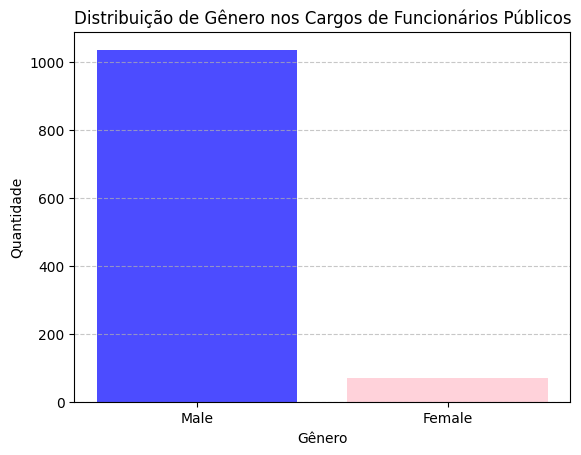

In [14]:
# Histograma
plt.bar(contagem_por_genero.index, contagem_por_genero.values, color=['blue', 'pink'], alpha=0.7)
plt.title("Distribuição de Gênero nos Cargos de Funcionários Públicos")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

2.2 Distribuição dos dados: Histograma e Bloxpot mostrando a média de tempo de vida do gênero feminino.

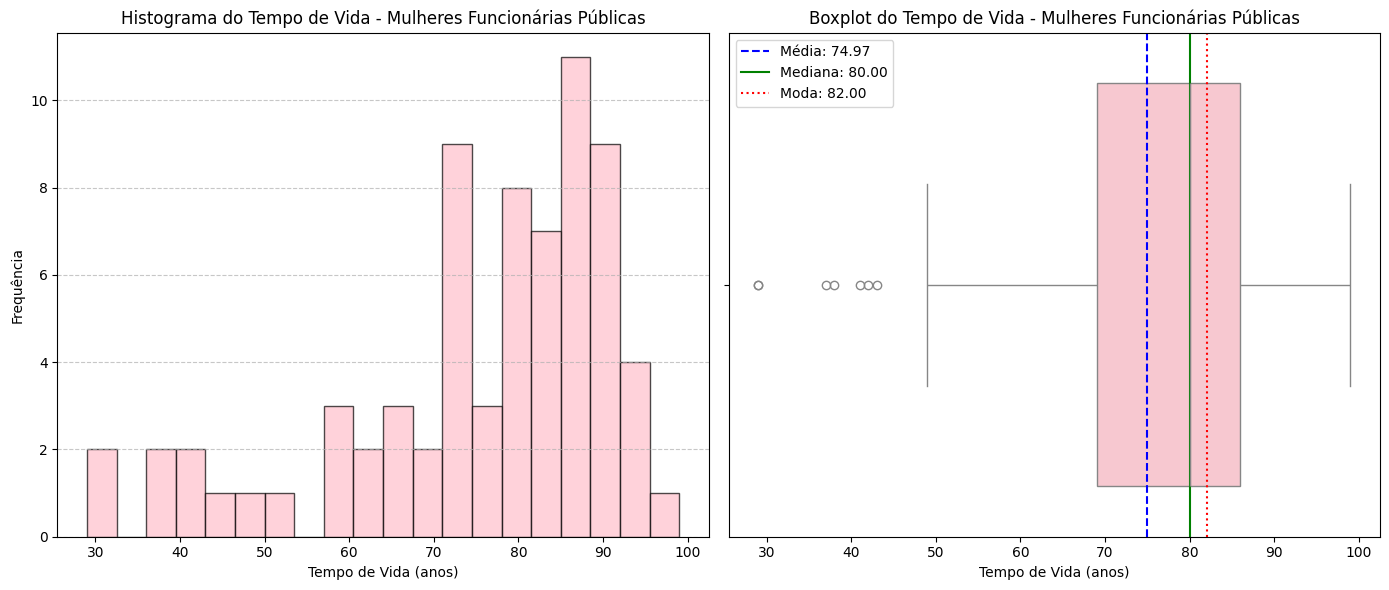

In [24]:
# Filtrar as mulheres
mulheres = filtered_data[filtered_data['Gender'] == 'Female'].copy()

# Calcular o tempo de vida
mulheres['Life_span'] = mulheres['Age of death'].fillna(
    mulheres['Death year'] - mulheres['Birth year']
)

# Remover valores inválidos
mulheres = mulheres[mulheres['Life_span'] > 0]

# Calcular as estatísticas (média, mediana, moda)
mean_life_span = mulheres['Life_span'].mean()
median_life_span = mulheres['Life_span'].median()
mode_life_span = mulheres['Life_span'].mode()[0]  # Moda pode ter múltiplos valores, usamos o primeiro

# Configuração dos gráficos
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(mulheres['Life_span'], bins=20, color='pink', edgecolor='black', alpha=0.7)
plt.title("Histograma do Tempo de Vida - Mulheres Funcionárias Públicas")
plt.xlabel("Tempo de Vida (anos)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=mulheres['Life_span'], color='pink')
plt.title("Boxplot do Tempo de Vida - Mulheres Funcionárias Públicas")
plt.xlabel("Tempo de Vida (anos)")

# Adicionar as linhas para Média, Mediana e Moda
plt.axvline(mean_life_span, color='blue', linestyle='--', label=f'Média: {mean_life_span:.2f}')
plt.axvline(median_life_span, color='green', linestyle='-', label=f'Mediana: {median_life_span:.2f}')
plt.axvline(mode_life_span, color='red', linestyle=':', label=f'Moda: {mode_life_span:.2f}')

# Exibir a legenda
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()

1.   Média do Tempo de Vida: 74.97 anos
2.   Mediana do Tempo de Vida: 80.00 anos
3.Moda do Tempo de Vida: 82.00 anos







In [28]:
# Calcular a média do tempo de vida para mulheres
mean_female = mulheres['Life_span'].mean()

# Calcular a variação (desvio absoluto médio)
mean_deviation_female = (mulheres['Life_span'] - mean_female).abs().mean()

# Exibir o resultado
print(f'Média de Variação (Desvio Absoluto Médio) do Tempo de Vida (Mulheres): {mean_deviation_female:.2f} anos')


Média de Variação (Desvio Absoluto Médio) do Tempo de Vida (Mulheres): 12.60 anos


2.3 Distribuição dos dados: Histograma e Bloxpot mostrando a média de tempo de vida do gênero masculino.

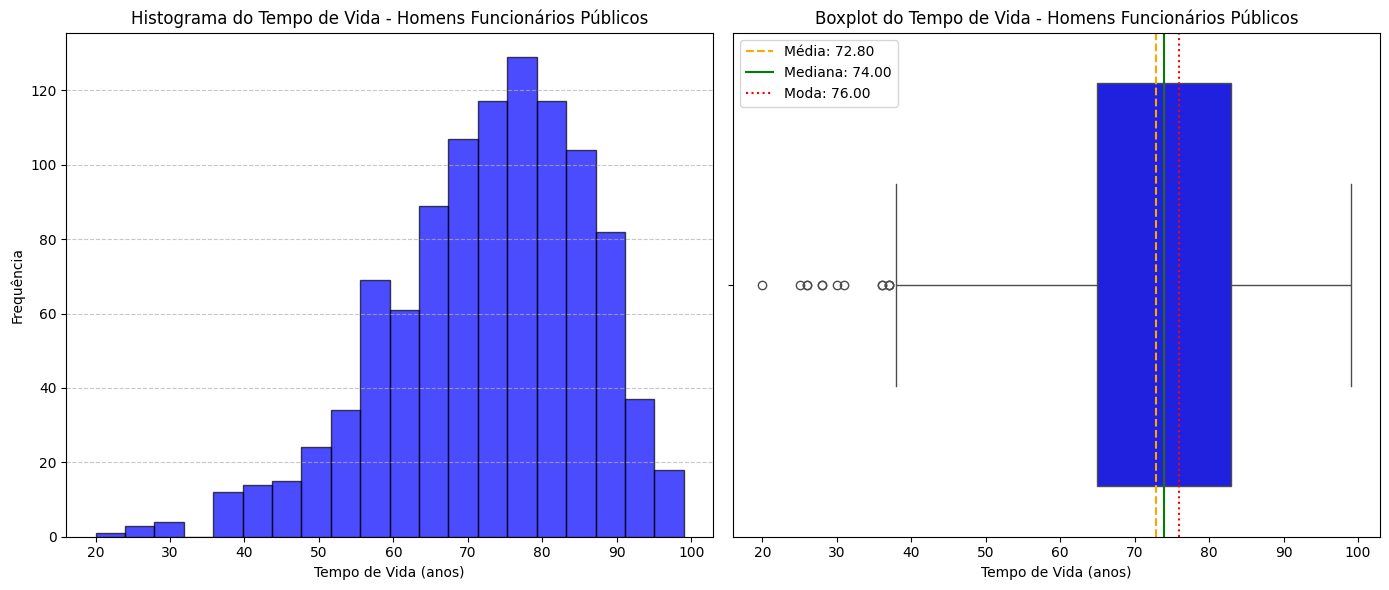

In [25]:
# Filtrar os homens
homens = filtered_data[filtered_data['Gender'] == 'Male'].copy()

# Calcular o tempo de vida
homens['Life_span'] = homens['Age of death'].fillna(
    homens['Death year'] - homens['Birth year']
)

# Remover valores inválidos
homens = homens[homens['Life_span'] > 0]

# Calcular as estatísticas (média, mediana, moda)
mean_life_span = homens['Life_span'].mean()
median_life_span = homens['Life_span'].median()
mode_life_span = homens['Life_span'].mode()[0]  # Moda pode ter múltiplos valores, usamos o primeiro

# Configuração dos gráficos
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(homens['Life_span'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histograma do Tempo de Vida - Homens Funcionários Públicos")
plt.xlabel("Tempo de Vida (anos)")
plt.ylabel("Frequência")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=homens['Life_span'], color='blue')
plt.title("Boxplot do Tempo de Vida - Homens Funcionários Públicos")
plt.xlabel("Tempo de Vida (anos)")

# Adicionar as linhas para Média, Mediana e Moda
plt.axvline(mean_life_span, color='orange', linestyle='--', label=f'Média: {mean_life_span:.2f}')
plt.axvline(median_life_span, color='green', linestyle='-', label=f'Mediana: {median_life_span:.2f}')
plt.axvline(mode_life_span, color='red', linestyle=':', label=f'Moda: {mode_life_span:.2f}')

# Exibir a legenda
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()

1.   Média do Tempo de Vida: 72.80 anos
2.   Mediana do Tempo de Vida: 74.00 anos
3.   Moda do Tempo de Vida: 76.00 anos

In [29]:
# Calcular a média do tempo de vida para homens
mean_male = homens['Life_span'].mean()

# Calcular a variação (desvio absoluto médio)
mean_deviation_male = (homens['Life_span'] - mean_male).abs().mean()

# Exibir o resultado
print(f'Média de Variação (Desvio Absoluto Médio) do Tempo de Vida (Homens): {mean_deviation_male:.2f} anos')


Média de Variação (Desvio Absoluto Médio) do Tempo de Vida (Homens): 10.73 anos


# 3. Formulação da hipótese

# Hipótese:

Existe uma diferença significativa entre homens e mulheres funcionários públicos, tanto em relação à quantidade de indivíduos de cada gênero que ocupam esses cargos, quanto no tempo de vida médio entre os gêneros, com mulheres apresentando maior longevidade e representando uma maior parte da população de funcionários públicos.

# Justificativa:

Em muitos contextos populacionais, pode haver uma distribuição desigual de homens e mulheres em determinadas profissões. No caso dos funcionários públicos, é importante entender se há uma diferença no número de homens e mulheres que ocupam esses cargos.

Observa-se frequentemente que, em muitos contextos, as mulheres tendem a viver mais do que os homens. Esta hipótese explora se essa tendência também é observada entre os funcionários públicos e como isso pode variar entre os gêneros.

# 3.1 Tabelas

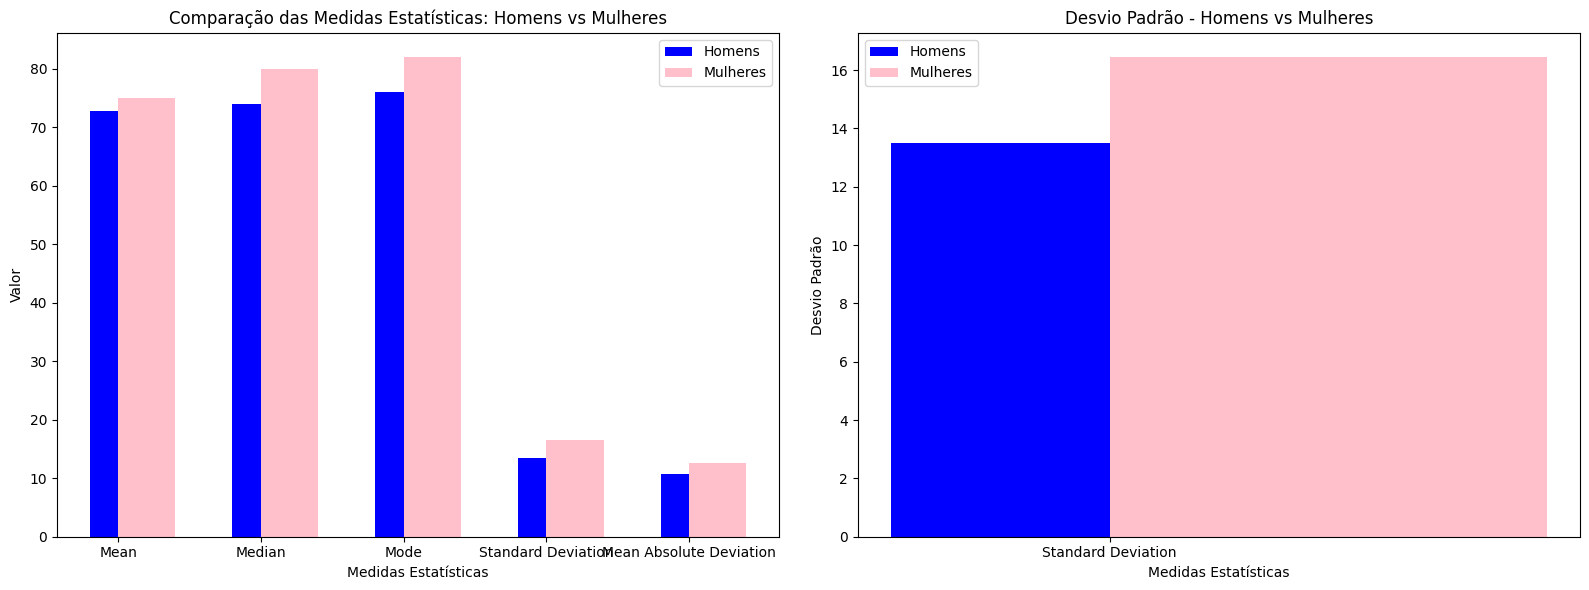

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular as medidas estatísticas para homens
mean_male = homens['Life_span'].mean()
median_male = homens['Life_span'].median()
mode_male = homens['Life_span'].mode()[0]
std_male = homens['Life_span'].std()
mean_deviation_male = (homens['Life_span'] - mean_male).abs().mean()

# Calcular as medidas estatísticas para mulheres
mean_female = mulheres['Life_span'].mean()
median_female = mulheres['Life_span'].median()
mode_female = mulheres['Life_span'].mode()[0]
std_female = mulheres['Life_span'].std()
mean_deviation_female = (mulheres['Life_span'] - mean_female).abs().mean()

# Criar um dicionário para estruturar as estatísticas
statistics = {
    'Measure': ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Mean Absolute Deviation'],
    'Male': [mean_male, median_male, mode_male, std_male, mean_deviation_male],
    'Female': [mean_female, median_female, mode_female, std_female, mean_deviation_female]
}

stats_df = pd.DataFrame(statistics)

styled_df = stats_df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
     {'selector': 'tbody td', 'props': [('text-align', 'center'), ('font-size', '14px')]},
     {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '80%'), ('margin', 'auto')]},
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]},
     {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'white')]},
     {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
     {'selector': 'th', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
    ]
).set_caption("Tabela Comparativa de Medidas Estatísticas: Homens vs Mulheres Funcionários Públicos")

# Exibir a tabela
styled_df

# Criando o gráfico de barras comparativo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras para comparar as médias e medianas
axes[0].bar(statistics['Measure'], statistics['Male'], width=0.4, label='Homens', align='center', color='blue')
axes[0].bar(statistics['Measure'], statistics['Female'], width=0.4, label='Mulheres', align='edge', color='pink')
axes[0].set_title('Comparação das Medidas Estatísticas: Homens vs Mulheres')
axes[0].set_xlabel('Medidas Estatísticas')
axes[0].set_ylabel('Valor')
axes[0].legend()

# Gráfico de barras para comparar os desvios padrão
axes[1].bar(statistics['Measure'][3], std_male, width=0.4, label='Homens', align='center', color='blue')
axes[1].bar(statistics['Measure'][3], std_female, width=0.4, label='Mulheres', align='edge', color='pink')
axes[1].set_title('Desvio Padrão - Homens vs Mulheres')
axes[1].set_xlabel('Medidas Estatísticas')
axes[1].set_ylabel('Desvio Padrão')
axes[1].legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()


# 4. Conclusão

A análise mostra que, embora a diferença de quantidade de homens e mulheres seja uma realidade, as diferenças no tempo de vida e na dispersão dos dados entre os gêneros são mais relevantes. Mulheres tendem a ter uma vida mais longa e mais homogênea em termos de expectativa de vida, enquanto homens apresentam maior variação, o que pode ser um reflexo de fatores complexos de saúde e vida social. Estes dados podem ser explorados para criar políticas públicas que busquem melhorar a qualidade de vida para ambos os gêneros, promovendo igualdade no ambiente de trabalho e na saúde.

Esses insights podem abrir caminho para mais investigações sobre a relação entre o tempo de vida dos funcionários públicos e as políticas que impactam suas condições de trabalho e bem-estar.